加载数据，训练模型

In [15]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


In [16]:
data = pd.read_csv('data.csv')

In [17]:
data.columns

Index(['cell_id', 'x', 'y', 'DAPI-01', 'CD20', 'CXCR5', 'IL21', 'PAX5',
       'PMTOR', 'LAG3', 'KI67', 'BCA1', 'FOXP3', 'STAT3', 'TBET', 'CD4',
       'IRF4', 'CD45RO', 'CD3E', 'VIMENTIN', 'CD38', 'PD1', 'PAN CYTO', 'CD21',
       'ICOS', 'MAC2/GAL3', 'CD8', 'PDL1', 'S100B', 'GZMB', 'TCF1', 'IRF7',
       'IFNG', 'CD19', 'STAT1', 'TOX', 'CD11C', 'CD45', 'HLA DR', 'CD39',
       'CXCR3', 'IL21R', 'Cluster', 'Cell Cluster'],
      dtype='object')

In [18]:
data = data.drop('cell_id', axis=1)
data = data.drop('x', axis=1)
data = data.drop('y', axis=1)
data = data.drop('Cell Cluster', axis=1)

In [19]:
data.columns

Index(['DAPI-01', 'CD20', 'CXCR5', 'IL21', 'PAX5', 'PMTOR', 'LAG3', 'KI67',
       'BCA1', 'FOXP3', 'STAT3', 'TBET', 'CD4', 'IRF4', 'CD45RO', 'CD3E',
       'VIMENTIN', 'CD38', 'PD1', 'PAN CYTO', 'CD21', 'ICOS', 'MAC2/GAL3',
       'CD8', 'PDL1', 'S100B', 'GZMB', 'TCF1', 'IRF7', 'IFNG', 'CD19', 'STAT1',
       'TOX', 'CD11C', 'CD45', 'HLA DR', 'CD39', 'CXCR3', 'IL21R', 'Cluster'],
      dtype='object')

In [20]:
# 提取特征和目标变量
X = data.drop('Cluster', axis=1)
y = data['Cluster']

# 对目标变量进行编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 转换为张量
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [21]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, len(label_encoder.classes_))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x



Epoch [1/100], Loss: 2.0038
Epoch [2/100], Loss: 1.4514
Epoch [3/100], Loss: 1.4863
Epoch [4/100], Loss: 1.3692
Epoch [5/100], Loss: 1.1680
Epoch [6/100], Loss: 1.1009
Epoch [7/100], Loss: 1.1106
Epoch [8/100], Loss: 1.1271
Epoch [9/100], Loss: 1.1157
Epoch [10/100], Loss: 1.0750
Epoch [11/100], Loss: 1.0228
Epoch [12/100], Loss: 0.9720
Epoch [13/100], Loss: 0.9269
Epoch [14/100], Loss: 0.8928
Epoch [15/100], Loss: 0.8659
Epoch [16/100], Loss: 0.8412
Epoch [17/100], Loss: 0.8126
Epoch [18/100], Loss: 0.7771
Epoch [19/100], Loss: 0.7424
Epoch [20/100], Loss: 0.7137
Epoch [21/100], Loss: 0.6854
Epoch [22/100], Loss: 0.6588
Epoch [23/100], Loss: 0.6345
Epoch [24/100], Loss: 0.6127
Epoch [25/100], Loss: 0.5939


Epoch [26/100], Loss: 0.5769
Epoch [27/100], Loss: 0.5559
Epoch [28/100], Loss: 0.5344
Epoch [29/100], Loss: 0.5109
Epoch [30/100], Loss: 0.4906
Epoch [31/100], Loss: 0.4693
Epoch [32/100], Loss: 0.4488
Epoch [33/100], Loss: 0.4257
Epoch [34/100], Loss: 0.4021
Epoch [35/100], Loss: 0.3769
Epoch [36/100], Loss: 0.3537
Epoch [37/100], Loss: 0.3308
Epoch [38/100], Loss: 0.3092
Epoch [39/100], Loss: 0.2887
Epoch [40/100], Loss: 0.2674
Epoch [41/100], Loss: 0.2480
Epoch [42/100], Loss: 0.2294
Epoch [43/100], Loss: 0.2123
Epoch [44/100], Loss: 0.1973
Epoch [45/100], Loss: 0.1838
Epoch [46/100], Loss: 0.1703
Epoch [47/100], Loss: 0.1573
Epoch [48/100], Loss: 0.1458
Epoch [49/100], Loss: 0.1352
Epoch [50/100], Loss: 0.1259
Epoch [51/100], Loss: 0.1172
Epoch [52/100], Loss: 0.1089
Epoch [53/100], Loss: 0.1015
Epoch [54/100], Loss: 0.0954
Epoch [55/100], Loss: 0.0898
Epoch [56/100], Loss: 0.0844
Epoch [57/100], Loss: 0.0800
Epoch [58/100], Loss: 0.0762
Epoch [59/100], Loss: 0.0728
Epoch [60/100]

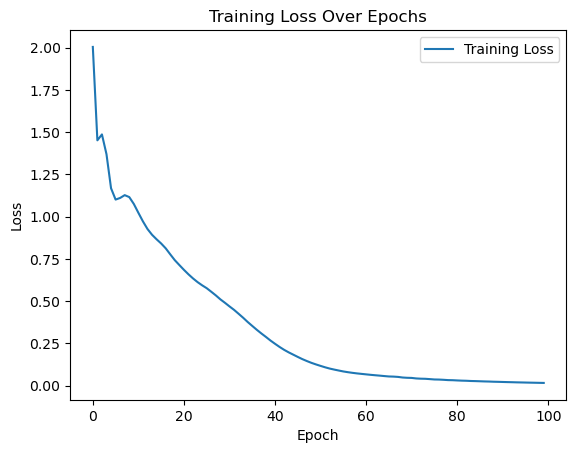

模型在测试集上的准确率: 0.954


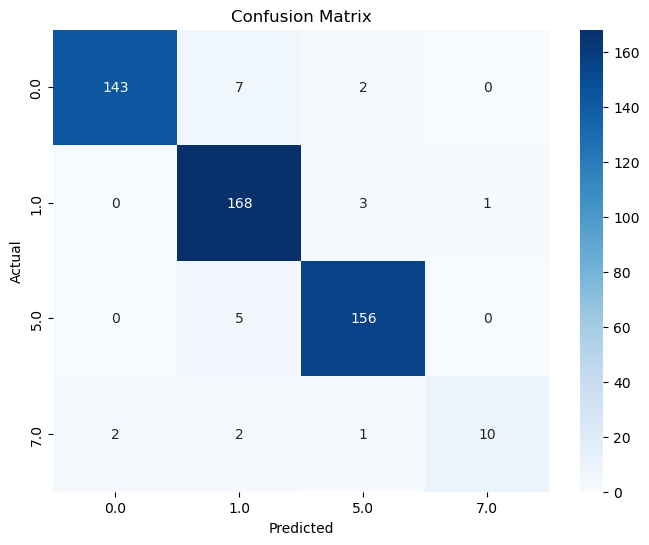

In [22]:

model = MLP(input_size=X.shape[1])


# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 用于记录每个epoch的损失值
losses = []

# 训练模型
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # 记录损失值
    losses.append(loss.item())

    # 打印每个epoch的损失值
    print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

# 绘制损失曲线
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# 保存模型
torch.save(model.state_dict(), 'mlp_model.pth')

# 预测并计算准确率
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(predicted.numpy(), y_test)

    print(f'模型在测试集上的准确率: {accuracy}')

    # 计算混淆矩阵
    cm = confusion_matrix(y_test, predicted)

    # 可视化混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


加载模型，预测新数据

In [23]:
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


In [24]:
testData = pd.read_csv('testData.csv')

In [32]:
# Print the true labels ("Cluster") for the new data
true_labels = testData['Cluster'].values
print("True labels for the new data:")
print(true_labels)

# Drop unnecessary columns similar to the training data preprocessing
new_data = testData.drop(['cell_id', 'x', 'y', 'Cell Cluster', 'Cluster'], axis=1)

# Load the saved model
loaded_model = MLP(input_size=new_data.shape[1])
loaded_model.load_state_dict(torch.load('mlp_model.pth'))
loaded_model.eval()

# Convert new data to tensor
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float32)

# Make predictions on the new data
with torch.no_grad():
    new_outputs = loaded_model(new_data_tensor)
    _, new_predicted = torch.max(new_outputs, 1)

# Decode the predicted labels if needed
decoded_predictions = label_encoder.inverse_transform(new_predicted.numpy())

# Print or use the predictions as needed
print("Predictions on new data:")
print(decoded_predictions)



True labels for the new data:
[5. 0. 5. 5. 5. 5. 5. 5. 1. 0. 7. 0. 0. 0. 5. 0. 5. 1. 5. 5.]
Predictions on new data:
[5. 0. 5. 5. 5. 5. 5. 5. 1. 0. 7. 0. 0. 0. 5. 0. 5. 1. 5. 5.]
